In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# load classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Hierarchical Cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem7_avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:
df.region.value_counts()

,count
region,
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

In [ ]:
df.shape

(18249, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.describe(percentiles=[0.25,.5,.75,.98,.995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
ID,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,5.100000e+01,5.200000e+01,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,2.340000e+00,2.707600e+00,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,6.303591e+06,3.252599e+07,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,2.805307e+06,1.179467e+07,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,2.261075e+06,1.113842e+07,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2.371003e+05,8.023058e+05,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,1.846537e+06,9.353291e+06,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,1.436144e+06,6.807581e+06,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5.232908e+05,1.995834e+06,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,3.944922e+04,9.453240e+04,551693.65


In [ ]:
df.rename(columns={"Unnamed: 0": "ID"}, inplace=True)

In [ ]:
df.head()

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


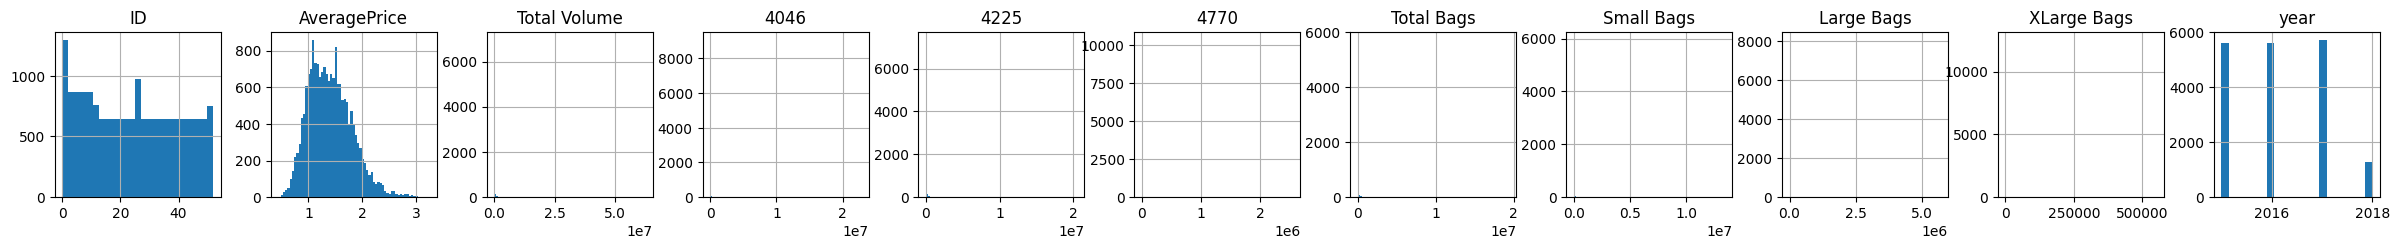

In [ ]:
df.hist(figsize=(30,30), bins='auto', layout=(11, 11), xlabelsize=10, ylabelsize=10)
plt.show()

In [ ]:
df[["region", "AveragePrice"]].nlargest(10, "AveragePrice").style.background_gradient(cmap="Greens")

,region,AveragePrice
14125,SanFrancisco,3.250000
17428,Tampa,3.170000
14124,SanFrancisco,3.120000
16055,MiamiFtLauderdale,3.050000
16720,RaleighGreensboro,3.040000
13037,LasVegas,3.030000
16715,RaleighGreensboro,3.000000
16985,SanFrancisco,3.000000
14123,SanFrancisco,2.990000
15814,Jacksonville,2.990000


In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Now apply the correlation function on the numeric columns and format precision
numeric_df.corr().style.background_gradient(cmap="YlOrRd").format(precision=2)

,ID,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
ID,1.00,-0.13,0.01,0.02,0.02,0.04,-0.00,0.00,-0.01,-0.01,-0.17
AveragePrice,-0.13,1.00,-0.19,-0.21,-0.17,-0.18,-0.18,-0.17,-0.17,-0.12,0.09
Total Volume,0.01,-0.19,1.00,0.98,0.97,0.87,0.96,0.97,0.88,0.75,0.02
4046,0.02,-0.21,0.98,1.00,0.93,0.83,0.92,0.93,0.84,0.70,0.00
4225,0.02,-0.17,0.97,0.93,1.00,0.89,0.91,0.92,0.81,0.69,-0.01
4770,0.04,-0.18,0.87,0.83,0.89,1.00,0.79,0.80,0.70,0.68,-0.04
Total Bags,-0.00,-0.18,0.96,0.92,0.91,0.79,1.00,0.99,0.94,0.80,0.07
Small Bags,0.00,-0.17,0.97,0.93,0.92,0.80,0.99,1.00,0.90,0.81,0.06
Large Bags,-0.01,-0.17,0.88,0.84,0.81,0.70,0.94,0.90,1.00,0.71,0.09
XLarge Bags,-0.01,-0.12,0.75,0.70,0.69,0.68,0.80,0.81,0.71,1.00,0.08


There is no strong positive or negative relationship between AVGprice and other features.

In [ ]:
y = df['AveragePrice']
X = sm.add_constant(df.drop(['AveragePrice','region', "Date", "type"],axis=1), prepend=False)

In [ ]:
# split data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# base model
mod = sm.OLS(y_train, sm.add_constant(X_train))  # Add constant for intercept
res = mod.fit()

In [ ]:
# Make predictions on the test set
y_pred = res.predict(sm.add_constant(X_test))

# Calculate R-squared (R2) and Mean Squared Error (MSE) on the test set
r2_base = r2_score(y_test, y_pred)
mse_base = mean_squared_error(y_test, y_pred)

print("R-squared (R2) on OLS model:", r2_base)
print("Mean Squared Error (MSE) on OLS:", mse_base)

R-squared (R2) on OLS model: 0.07323890130221544
Mean Squared Error (MSE) on OLS: 0.14890185618227347


In [ ]:
#Train with other models
#Lasso model
paramslasso = {'alpha':[0.001,0.01,0.1,1,10]}

lasso = Lasso(random_state=42)
CV_lasso = GridSearchCV(estimator=lasso, param_grid=paramslasso, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_lasso.fit(X_train, y_train)

target_pred = CV_lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, target_pred)
mse_lasso = mean_squared_error(y_test, target_pred)
print("R2 score in Lasso\t", r2_score_lasso)
print("MSE in Lasso\t", mse_lasso)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
R2 score in Lasso	 0.07319108172616451
MSE in Lasso	 0.1489095393097222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+03, tolerance: 2.372e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Decision Tree model
paramsdtr = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

dtr = DecisionTreeRegressor(random_state=42)
CV_dtr = GridSearchCV(estimator=dtr, param_grid=paramsdtr, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_dtr.fit(X_train, y_train)

target_pred = CV_dtr.predict(X_test)
r2_score_dtr = r2_score(y_test, target_pred)
mse_dtr = mean_squared_error(y_test, target_pred)
print("R2 score in DCT\t", r2_score_dtr)
print("MSE in DCT\t", mse_dtr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score in DCT	 0.7422805541640844
MSE in DCT	 0.041407547115601046


In [ ]:
# Random Forest model
paramsrfg = {'n_estimators': [10,20,30,40,50], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

rfg = RandomForestRegressor(random_state=42)
CV_rfg = GridSearchCV(estimator=rfg, param_grid=paramsrfg, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_rfg.fit(X_train, y_train)

target_pred = CV_rfg.predict(X_test)
r2_score_rfg = r2_score(y_test, target_pred)
mse_rfg = mean_squared_error(y_test, target_pred)
print("R2 score in RFG\t", r2_score_rfg)
print("MSE in RFG\t", mse_rfg)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R2 score in RFG	 0.8642678189448072
MSE in RFG	 0.021807965106849316


In [ ]:
# AdaBoostRegressor model
paramsabr = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

abr = AdaBoostRegressor(random_state=42)
CV_abr = GridSearchCV(estimator=abr, param_grid=paramsabr, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_abr.fit(X_train, y_train)

target_pred = CV_abr.predict(X_test)
r2_score_abr = r2_score(y_test, target_pred)
mse_abr = mean_squared_error(y_test, target_pred)
print("R2 score in ABR\t", r2_score_abr)
print("MSE in ABR\t", mse_abr)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2 score in ABR	 0.49972843746063345
MSE in ABR	 0.08037817336311125


In [ ]:
# Random XGBoost model
paramsgbr = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

gbr = GradientBoostingRegressor(random_state=42)
CV_gbr = GridSearchCV(estimator=gbr, param_grid=paramsgbr, cv=10,  n_jobs=5, verbose=1, scoring='r2')
CV_gbr.fit(X_train, y_train)

target_pred = CV_gbr.predict(X_test)
r2_score_GBR = r2_score(y_test, target_pred)
mse_GBR = mean_squared_error(y_test, target_pred)
print("R2 score in GBR\t", r2_score_GBR)
print("MSE in GBR\t", mse_GBR)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
R2 score in GBR	 0.7460945864749328
MSE in GBR	 0.04079475004047298


In [ ]:
cv_name = ['res', 'CV_lasso', 'CV_dtr', 'CV_rfg', 'CV_abr', 'CV_gbr']
r2 = []
mse = []

for cv in cv_name:
  model = globals()[cv]
  if cv == 'res':
    target_pred = model.predict(sm.add_constant(X_test))
  else:
    target_pred = model.predict(X_test)

  r2.append(r2_score(y_test, target_pred))
  mse.append(mean_squared_error(y_test, target_pred))

In [ ]:
r2 = [r2_base, r2_score_lasso, r2_score_dtr, r2_score_rfg, r2_score_abr, r2_score_GBR]
mse = [mse_base, mse_lasso, mse_dtr, mse_rfg, mse_abr, mse_GBR]

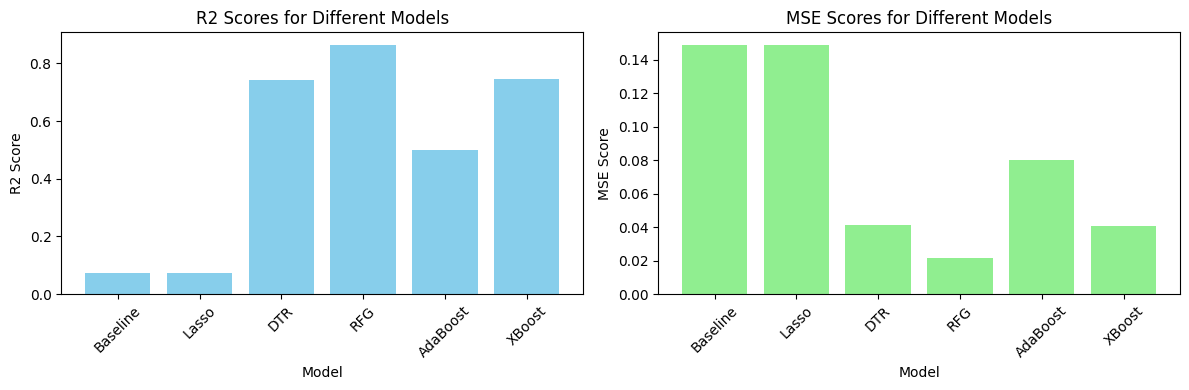

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

# Plot the first chart (R2 scores)
axs[0].bar(['Baseline', 'Lasso', 'DTR' ,'RFG', 'AdaBoost', 'XBoost'], r2, color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('R2 Score')
axs[0].set_title('R2 Scores for Different Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second chart (MSE scores)
axs[1].bar(['Baseline', 'Lasso', 'DTR' ,'RFG', 'AdaBoost', 'XBoost'], mse, color='lightgreen')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MSE Score')
axs[1].set_title('MSE Scores for Different Models')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()